### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [12]:
# http://lib.stat.cmu.edu/datasets/boston

 **Variables in order:**
 
 **CRIM**     per capita crime rate by town
 
 **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 **INDUS**    proportion of non-retail business acres per town
 
 **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 **NOX**      nitric oxides concentration (parts per 10 million)
 
 **RM**      average number of rooms per dwelling
 
 **AGE**      proportion of owner-occupied units built prior to 1940
 
 **DIS**      weighted distances to five Boston employment centres
 
 **RAD**      index of accessibility to radial highways
 
 **TAX**      full-value property-tax rate per $10,000
 
 **PTRATIO**  pupil-teacher ratio by town
 
 **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 **LSTAT**   % lower status of the population
 
 **MEDV**     Median value of owner-occupied homes in $1000's
 

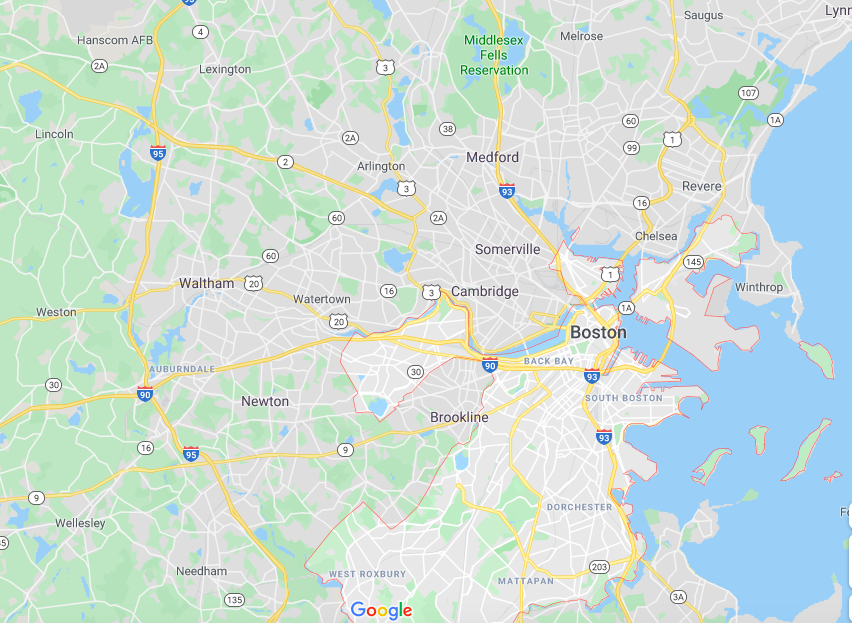

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.shape

(506, 14)

In [40]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# EDA

In [74]:
df.describe() # outlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
df.info() # no objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


# Cleaning

In [76]:
# lots of zeros in zn - but these must be all under 25.000 sqft lot
# and chas - but there its just stating not at the river)
#df.zn.replace(0,np.nan,inplace = True)
#df.info()

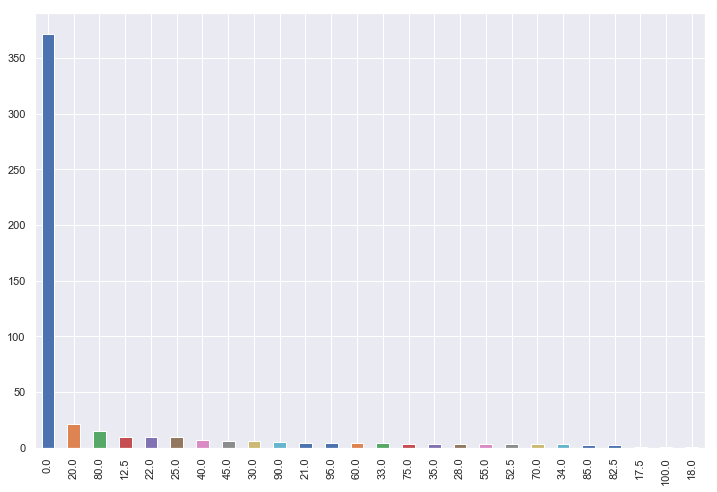

In [93]:
plt.figure(figsize=(12,8))
df.zn.value_counts().plot(kind='bar');

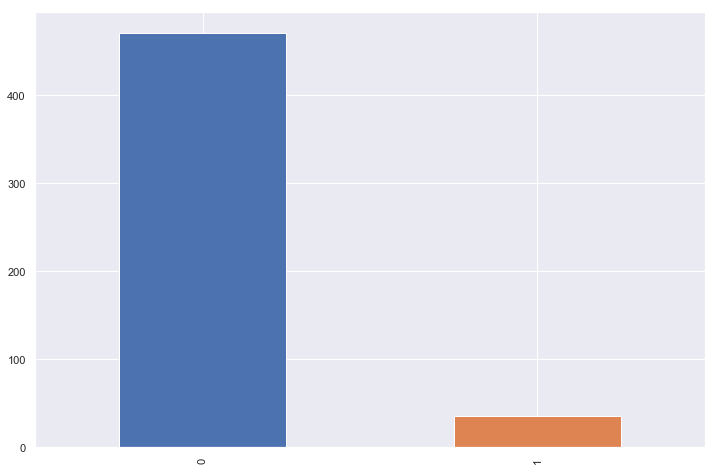

In [94]:
plt.figure(figsize=(12,8))
df.chas.value_counts().plot(kind='bar');

In [77]:
# no data missing
total = df.isnull().sum().sort_values(ascending=False)  
total

medv       0
lstat      0
b          0
ptratio    0
tax        0
rad        0
dis        0
age        0
rm         0
nox        0
chas       0
indus      0
zn         0
crim       0
dtype: int64

In [82]:
df.isnull().sum()/len(df) * 100  # percent missing

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

In [78]:
duplicate_rows_df = df[df.duplicated()]    # no duplicates
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


# Further EDA

In [79]:
df['crim'].describe ()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677082
max       88.976200
Name: crim, dtype: float64

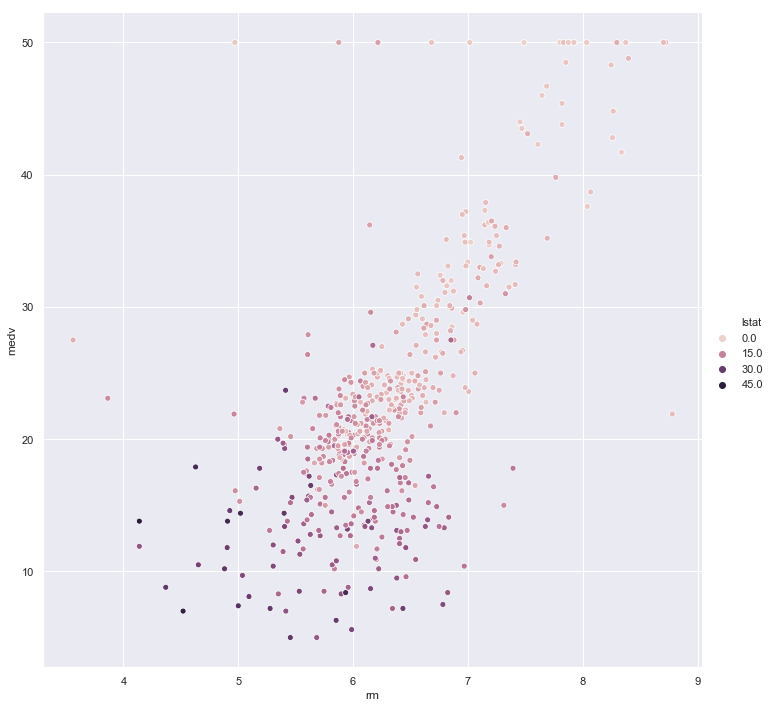

In [95]:
import seaborn as sb
sb.relplot(x='rm', y='medv', data=df, hue='lstat', height=10, sizes=(10, 100))

/Applications/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


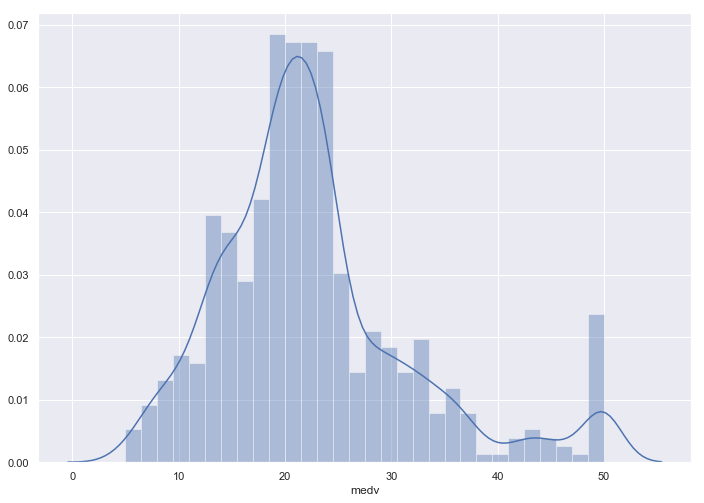

In [39]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.distplot(df['medv'], bins=30)
plt.show()

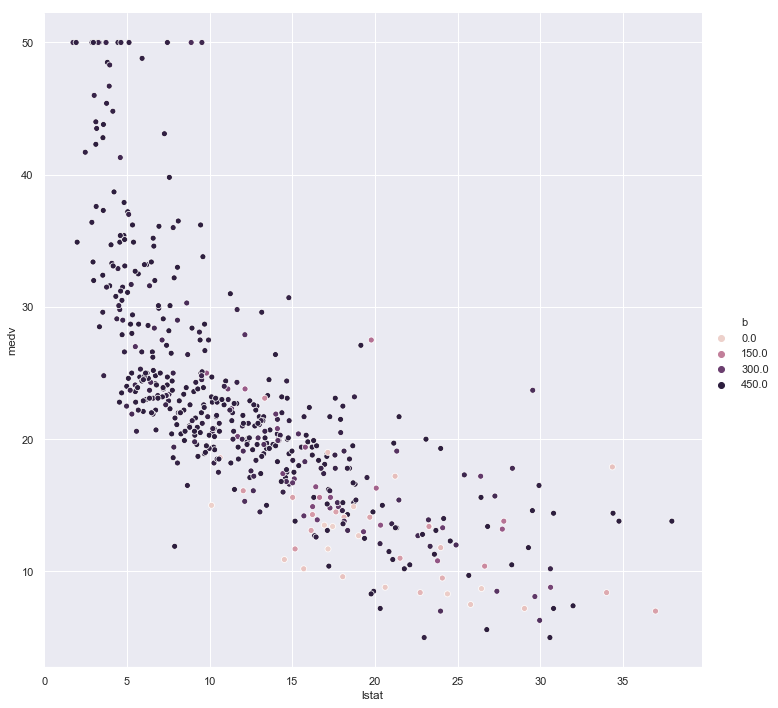

In [50]:
import seaborn as sb
sb.relplot(x='lstat', y='medv', data=df, hue='b', height=10, sizes=(10, 100))

In [ ]:
df_zip = df.groupby('chas', as_index=False).count()
#df_zip.shape
zipcode_group = df['medv'].groupby(df['chas'])
zipcode_group.median().sort_values(ascending=False).head()

In [107]:
#ax = sb.barplot(x="rm", y="medv", hue="chas", data=df)

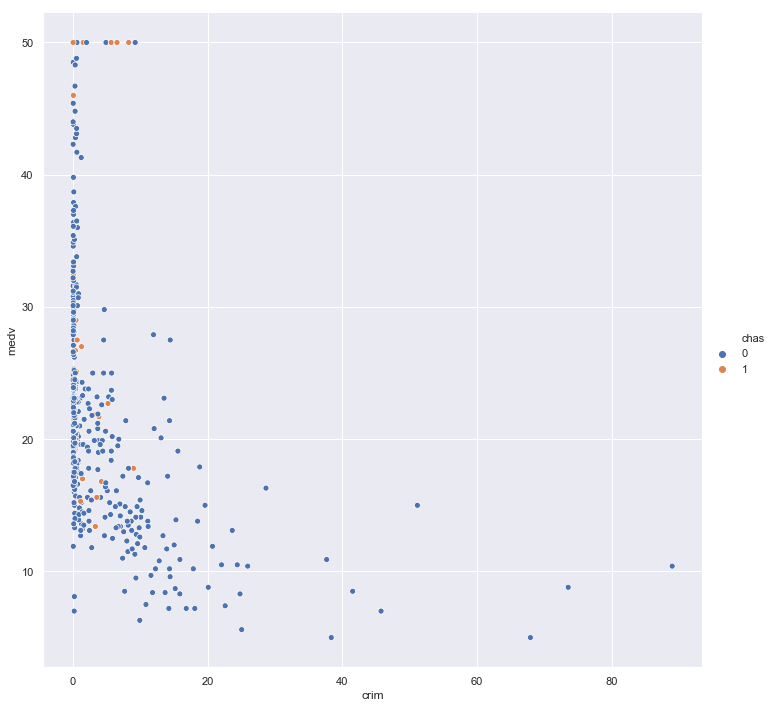

In [104]:
import seaborn as sb
sb.relplot(x='crim', y='medv', data=df, hue='chas', height=10, sizes=(10, 100))

In [106]:
#ax = sb.lineplot(x="rm", y='medv', hue="b", data=df)

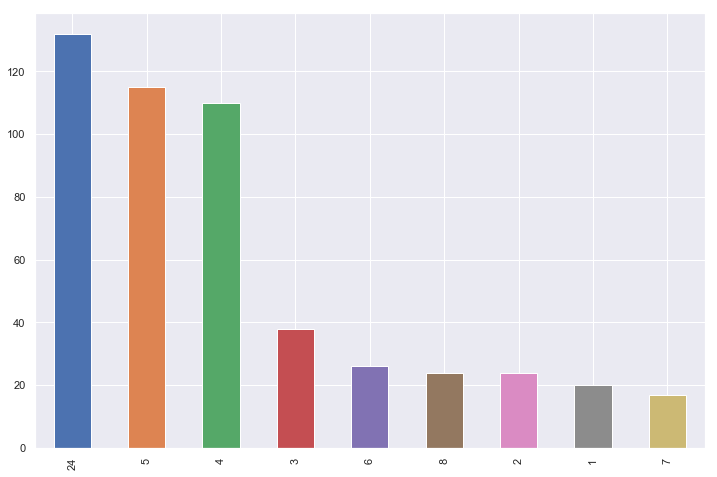

In [101]:
plt.figure(figsize=(12,8))
df.rad.value_counts().plot(kind='bar');

# Correlation

In [30]:
df.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

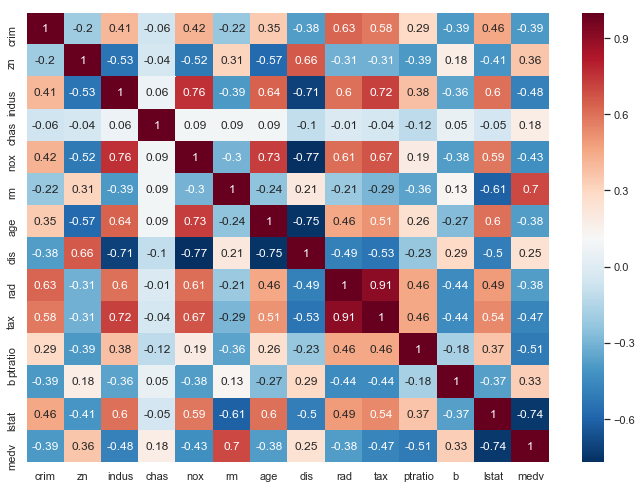

In [43]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sb.heatmap(data=correlation_matrix, annot=True, cmap='RdBu_r')

In [ ]:
# rad and tax are too correlated, both not interesting

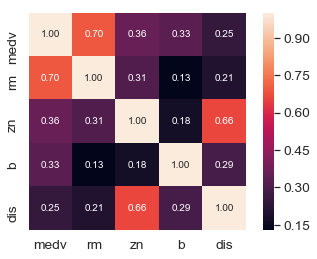

In [42]:
import numpy as np
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'medv')['medv'].index
cm = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/Applications/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


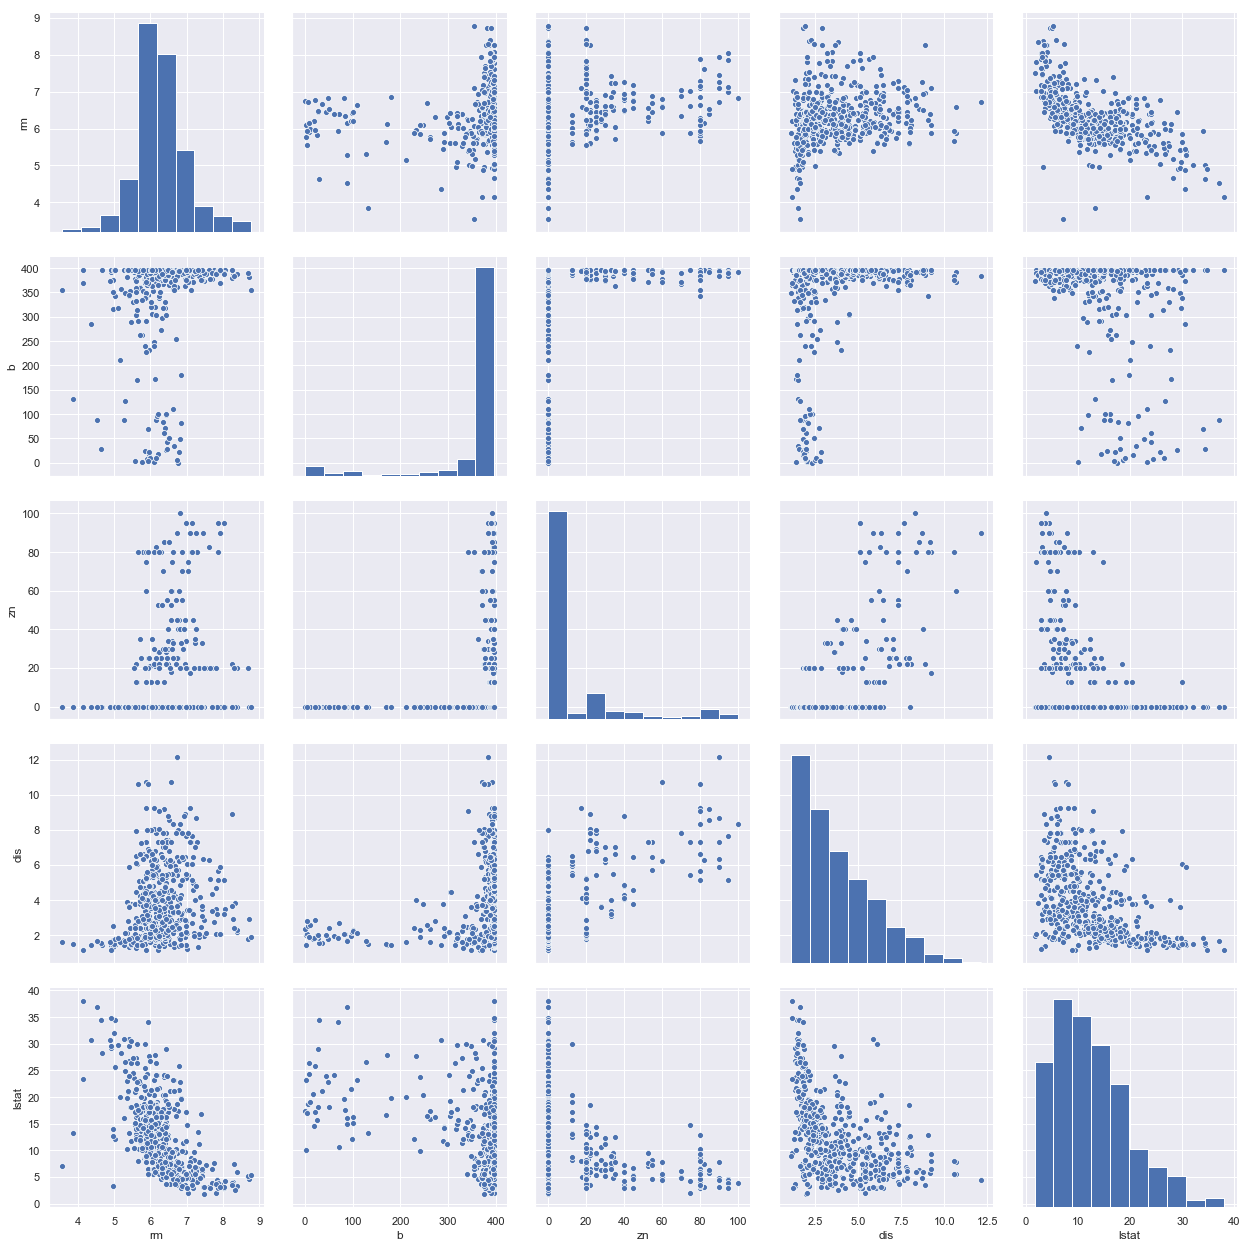

In [44]:
cols = ['rm', 'b', 'zn', 'dis', 'lstat']
sb.pairplot(df[cols], size = 3.5)
plt.show();

/Applications/anaconda3/envs/nf/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


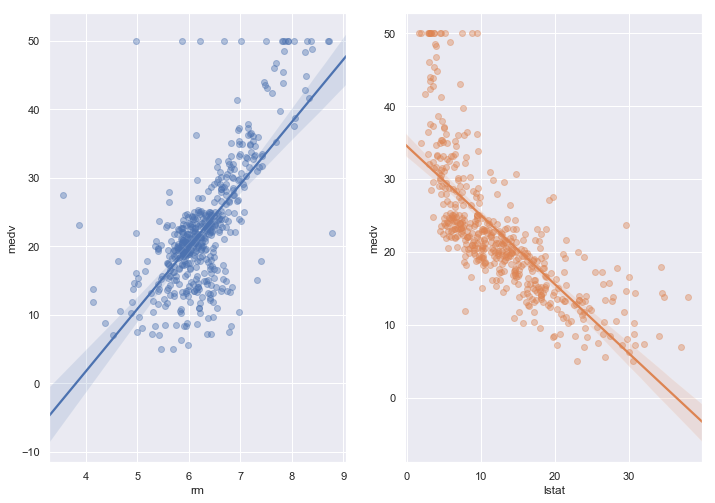

In [89]:
import seaborn as sb
fig, ax = plt.subplots(1, 2)
sb.regplot('rm', 'medv', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sb.regplot('lstat', 'medv', df, ax=ax[1],
scatter_kws={'alpha': 0.4})

# Multicolinearity

In [43]:
abs(df.corr()) > 0.8  # throw rad and tax out

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,True,False,False,False,False,False,False,False,False,False,False,False,False,False
zn,False,True,False,False,False,False,False,False,False,False,False,False,False,False
indus,False,False,True,False,False,False,False,False,False,False,False,False,False,False
chas,False,False,False,True,False,False,False,False,False,False,False,False,False,False
nox,False,False,False,False,True,False,False,False,False,False,False,False,False,False
rm,False,False,False,False,False,True,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,True,False,False,False,False,False,False,False
dis,False,False,False,False,False,False,False,True,False,False,False,False,False,False
rad,False,False,False,False,False,False,False,False,True,True,False,False,False,False
tax,False,False,False,False,False,False,False,False,True,True,False,False,False,False


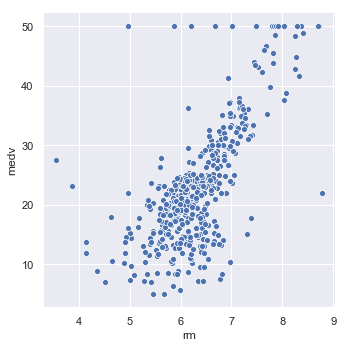

In [100]:
import seaborn as sb
sb.relplot(x='rm', y='medv', data=df)
scatter_kws={'alpha': 0.4}

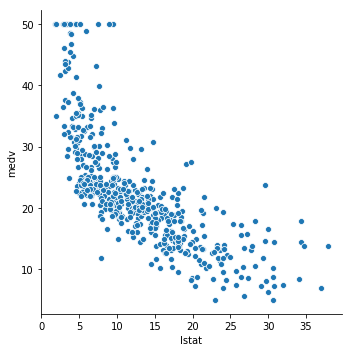

In [35]:
import seaborn as sb
sb.relplot(x='lstat', y='medv', data=df)

In [7]:
import statsmodels.api as sms

In [54]:
import statsmodels.formula.api as smf
model = 'medv ~ rm + lstat + ptratio + C(chas)'
smf.ols(formula = model, data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.5
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          5.11e-125
Time:                        22:24:22   Log-Likelihood:                -1546.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       18.1364      3.864      4.693      0.000      10.544      25.729
C(chas)[T.1]     3.4371      0.913      3.766      0.000       1.644       5.230
rm               4.4264      0.421     10.513      0.000       3.599       5.254
lstat           -0.5755      0.042    -13.802      0.000      -0.657      -0.494
ptratio         -0.8874      0.117     -7.604      0.000      -1.117      -0.658
==============================================================================
Omnibus:                      182.152   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.597
Skew:                           1.539   Prob(JB):                    2.40e-184
Kurtosis:                       8.534   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Prepare the data for training
# Split data into features and target
# Drop bad features

#X = df.drop(['medv', 'indus', 'crim', 'chas', 'nox', 'age', 'dis', 'rad', 'tax','ptratio'], axis=1)
X = df[['rm','lstat', 'zn']]
y = df[['medv']]

In [16]:
# Crossvalidate the model
model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.67638208  0.62993217 -1.44626711  0.49741898  0.57498721  0.48326549
 -0.21519658  0.05081886 -1.7416062   0.24000205]
Average cross-validation score: -0.03


In [17]:
# Split data set into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404, 1)
(102, 1)


In [18]:
# fit the train model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# model evaluation for training set
# get Root Mean Square Error RMSE an R2
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6789149825386165
R2 score is 0.6186577576055963


The model performance for testing set
--------------------------------------
RMSE is 4.828149974113085
R2 score is 0.721358823555518


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

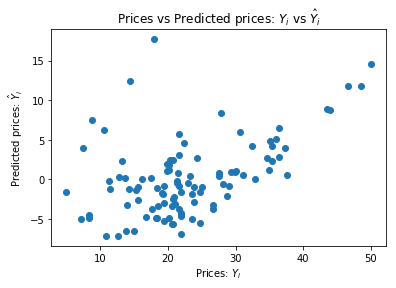

In [20]:
plt.scatter(Y_test, Y_test - y_test_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [1]:
plot(model)

NameError: name 'plot' is not defined

# Polynomial Regression

In [21]:
# polynomial regression 91%
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)


# model evaluation for training set
# get Root Mean Square Error RMSE an R2
x_poly_train = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly_train, Y_train)
y_poly_pred1 = model.predict(x_poly_train)

rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred1))
r2 = r2_score(Y_train,y_poly_pred1)
print(rmse)
print(r2)

# model evaluation for test set
# get Root Mean Square Error RMSE an R2
x_poly_test = polynomial_features.fit_transform(X_test)
#model = LinearRegression()
#model.fit(x_poly_test, y_test)
y_poly_pred2 = model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(Y_test,y_poly_pred2))
r2 = r2_score(Y_test,y_poly_pred2)
print(rmse)
print(r2)

4.533084577908643
0.7570192734834729
3.6127045123396275
0.8439913515761205


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

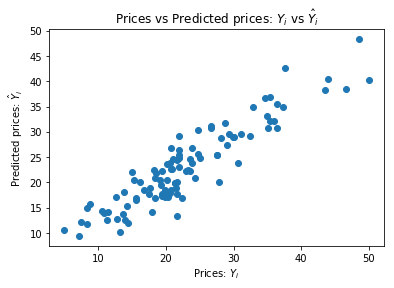

In [22]:
plt.scatter(Y_test, y_poly_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

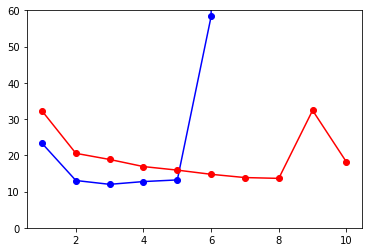

In [23]:
# Fitting Polynomial Regression to the dataset and store test scores for different polynomial degrees:
MSE_train = []
MSE_test = []
for i in range(1,11):
   poly_reg = PolynomialFeatures(degree=i)
   X_train_poly = poly_reg.fit_transform(X_train)
   X_test_poly = poly_reg.fit_transform(X_test)
   pol_reg = LinearRegression()
   pol_reg.fit(X_train_poly, Y_train)
   y_pred3 = pol_reg.predict(X_train_poly)
   y_pred4 = pol_reg.predict(X_test_poly)
   MSE_train.append(mean_squared_error(Y_train, y_pred3))
   MSE_test.append(mean_squared_error(Y_test, y_pred4))
Poly_Degree = list(range(1,11))
plt.plot(Poly_Degree, MSE_test, marker='o', color='blue')
plt.plot(Poly_Degree, MSE_train, marker='o', color='red')
plt.ylim(0,60)
plt.show()


# K Fold Cross

In [42]:
#from sklearn.model_selection import KFold 
#kf = KFold(n_splits=10, random_state=None, shuffle=False) 

#for train, test in kf.split(X):
      #print("Train:", train_index, "Validation:",test_index)
      #X_train, X_test = X[train], X[test] 
      #Y_train, Y_test = y[train], y[test]
        #print("%s %s" % (train, test))
#cross_val_score()

In [41]:
# Crossvalidate the polynomial model 
model = LinearRegression()

scores = cross_val_score(model, x_poly_test, Y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.69344208 0.5265003  0.85002952 0.86947318 0.76805197 0.6089201
 0.94426412 0.31154707 0.32434702 0.910657  ]
Average cross-validation score: 0.68
